### This notebook is based on the linear regression tutorial code from the blog post [PyTorch (3) Linear Regression](http://aidiary.hatenablog.com/entry/20180131/1517387821)



In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# hyper parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [2]:
# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

In [3]:
# linear regression model
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

In [4]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# train the model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))

Epoch [10/60], Loss: 0.4990
Epoch [20/60], Loss: 0.4973
Epoch [30/60], Loss: 0.4956
Epoch [40/60], Loss: 0.4939
Epoch [50/60], Loss: 0.4923
Epoch [60/60], Loss: 0.4906


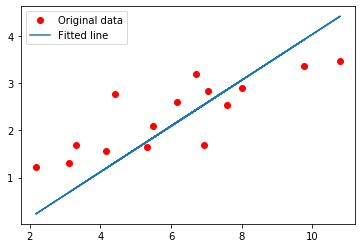

In [11]:
# plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()